In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
%matplotlib inline

# Read CSV into DataFrame
df = pd.read_csv("final_output.csv")
df

,School Name,School ID,School Type,School Size,10 Year Median Earnings,10 Year Mean Earnings,Lat,Lng,City,State,SAT Scores,ACT Scores,Admission Rate,Average Gross Cost,Average Net Price,Locale
0,University of California-Merced,445188,Public,7375.0,NaN,NaN,37.366237,-120.424944,Merced,CA,1114.0,24.0,0.6979,34330.0,13223.0,41.0
1,University of Southern California,123961,Private,18942.0,74000.0,88800.0,34.021281,-118.284169,Los Angeles,CA,1437.0,32.0,0.1595,69547.0,30232.0,11.0
2,West Los Angeles College,125471,Public,9622.0,31500.0,37300.0,34.004512,-118.386664,Culver City,CA,NaN,NaN,NaN,13255.0,6823.0,21.0
3,Pueblo Community College,127884,Public,3641.0,27700.0,31900.0,38.262124,-104.636258,Pueblo,CO,NaN,NaN,NaN,20783.0,14860.0,12.0
4,University of Colorado Boulder,126614,Public,28565.0,50800.0,59700.0,40.008781,-105.270823,Boulder,CO,1293.0,28.0,0.7984,29215.0,20706.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,Fresno Pacific University,114813,Private,2791.0,43900.0,45600.0,36.726831,-119.735199,Fresno,CA,1050.0,20.0,0.7239,38420.0,16177.0,11.0
1002,Foothill College,114716,Public,13873.0,46500.0,58300.0,37.361655,-122.127964,Los Altos Hills,CA,NaN,NaN,NaN,11726.0,5291.0,21.0
1003,Skyline College,123509,Public,8084.0,40500.0,45600.0,37.630420,-122.467335,San Bruno,CA,NaN,NaN,NaN,8929.0,1945.0,21.0
1004,Eastern Florida State College,132693,Public,12306.0,29300.0,34000.0,28.383610,-80.756474,Cocoa,FL,NaN,NaN,NaN,10069.0,5974.0,21.0


In [2]:
# Clean data
df_clean = df[["School Name", "School Type", "10 Year Median Earnings", "10 Year Mean Earnings", "SAT Scores", "ACT Scores"]]
df_clean = df_clean.dropna()
new_df = df_clean
new_df

,School Name,School Type,10 Year Median Earnings,10 Year Mean Earnings,SAT Scores,ACT Scores
1,University of Southern California,Private,74000.0,88800.0,1437.0,32.0
4,University of Colorado Boulder,Public,50800.0,59700.0,1293.0,28.0
9,Yale University,Private,83200.0,124400.0,1520.0,34.0
11,Central Connecticut State University,Public,47900.0,51600.0,1071.0,22.0
12,Barry University,Private,45800.0,50900.0,970.0,19.0
...,...,...,...,...,...,...
997,Lander University,Public,34200.0,38100.0,1022.0,20.0
998,College of Charleston,Public,40700.0,48700.0,1176.0,25.0
999,University of California-Irvine,Public,58400.0,65800.0,1291.0,29.0
1000,University of California-San Diego,Public,59900.0,69600.0,1343.0,30.0


In [3]:
# Get quartiles for ACT and SAT Scores
SAT_25th = np.percentile(df_clean["SAT Scores"], 25)
SAT_50th = np.percentile(df_clean["SAT Scores"], 50)
SAT_75th = np.percentile(df_clean["SAT Scores"], 75)
SAT_max = df_clean["SAT Scores"].max()

ACT_25th = np.percentile(df_clean["ACT Scores"], 25)
ACT_50th = np.percentile(df_clean["ACT Scores"], 50)
ACT_75th = np.percentile(df_clean["ACT Scores"], 75)
ACT_max = df_clean["ACT Scores"].max()

In [4]:
# Bin the SAT Scores
bins = [0, SAT_25th, SAT_50th, SAT_75th, SAT_max]
group_names = ["0 to " + str(SAT_25th), str(SAT_25th) + " to " + str(SAT_50th), str(SAT_50th) + " to " + str(SAT_75th), str(SAT_75th) + " to " + str(SAT_max)]

df_clean["SAT Bins"] = pd.cut(df["SAT Scores"], bins, labels = group_names)

# Bin the ACT Scores
bins = [0, ACT_25th, ACT_50th, ACT_75th, ACT_max]
group_names = ["0 to " + str(ACT_25th), str(ACT_25th) + " to " + str(ACT_50th), str(ACT_50th) + " to " + str(ACT_75th), str(ACT_75th) + " to " + str(ACT_max)]

df_clean["ACT Bins"] = pd.cut(df["ACT Scores"], bins, labels = group_names)
df_clean

,School Name,School Type,10 Year Median Earnings,10 Year Mean Earnings,SAT Scores,ACT Scores,SAT Bins,ACT Bins
1,University of Southern California,Private,74000.0,88800.0,1437.0,32.0,1229.5 to 1535.0,26.0 to 34.0
4,University of Colorado Boulder,Public,50800.0,59700.0,1293.0,28.0,1229.5 to 1535.0,26.0 to 34.0
9,Yale University,Private,83200.0,124400.0,1520.0,34.0,1229.5 to 1535.0,26.0 to 34.0
11,Central Connecticut State University,Public,47900.0,51600.0,1071.0,22.0,0 to 1081.5,0 to 22.0
12,Barry University,Private,45800.0,50900.0,970.0,19.0,0 to 1081.5,0 to 22.0
...,...,...,...,...,...,...,...,...
997,Lander University,Public,34200.0,38100.0,1022.0,20.0,0 to 1081.5,0 to 22.0
998,College of Charleston,Public,40700.0,48700.0,1176.0,25.0,1143.0 to 1229.5,24.0 to 26.0
999,University of California-Irvine,Public,58400.0,65800.0,1291.0,29.0,1229.5 to 1535.0,26.0 to 34.0
1000,University of California-San Diego,Public,59900.0,69600.0,1343.0,30.0,1229.5 to 1535.0,26.0 to 34.0


In [5]:
# Create a groupby with the bins
gb_ACT = df_clean.groupby(["ACT Bins"]).mean()
gb_ACT = gb_ACT.reset_index()
gb_ACT

,ACT Bins,10 Year Median Earnings,10 Year Mean Earnings,SAT Scores,ACT Scores
0,0 to 22.0,39948.471616,44176.855895,1036.847162,20.611354
1,22.0 to 24.0,44660.732984,49935.078534,1134.261780,23.497382
2,24.0 to 26.0,48857.657658,55502.702703,1199.567568,25.414414
3,26.0 to 34.0,60985.975610,72900.000000,1350.091463,29.652439


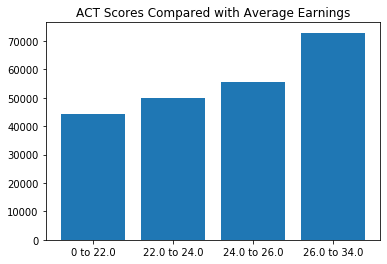

In [6]:
# Graph the data on bar charts
ypos = np.arange(len(gb_ACT["ACT Bins"]))

plt.xticks(ypos, gb_ACT["ACT Bins"])

plt.bar(ypos, gb_ACT["10 Year Mean Earnings"])
plt.title("ACT Scores Compared with Average Earnings")
plt.show()

In [7]:
gb_SAT = df_clean.groupby(["SAT Bins"]).mean()
gb_SAT = gb_SAT.reset_index()
gb_SAT

,SAT Bins,10 Year Median Earnings,10 Year Mean Earnings,SAT Scores,ACT Scores
0,0 to 1081.5,39824.712644,43844.827586,1015.505747,20.224138
1,1081.5 to 1143.0,43144.252874,48254.597701,1112.942529,22.827586
2,1143.0 to 1229.5,47320.231214,53179.768786,1180.601156,24.768786
3,1229.5 to 1535.0,60231.609195,72098.275862,1345.143678,29.402299


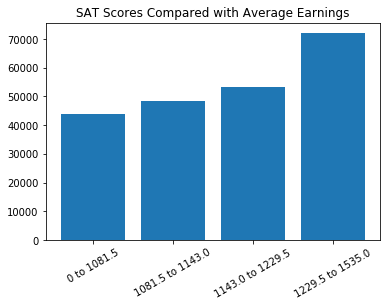

In [8]:
# Graph the data on bar charts
ypos = np.arange(len(gb_SAT["SAT Bins"]))

plt.xticks(ypos, gb_SAT["SAT Bins"], rotation = 30)

plt.bar(ypos, gb_SAT["10 Year Mean Earnings"])
plt.title("SAT Scores Compared with Average Earnings")
plt.show()

In [9]:
# Run a T-test to compare Public and Private Schools
private = new_df[new_df["School Type"] == "Private"]
public = new_df[new_df["School Type"] == "Public"]

ttest_output = ttest_ind(private["10 Year Mean Earnings"], public["10 Year Mean Earnings"])
p_value = ttest_output[1]
p_value

7.80366120920384e-27

In [88]:
# Create a Groupby for the School Type
gb_type = new_df.groupby(["School Type"]).mean()
gb_type = gb_type.reset_index()
gb_type

,School Type,10 Year Median Earnings,10 Year Mean Earnings,SAT Scores,ACT Scores
0,Private,53154.861111,61680.208333,1220.666667,25.961806
1,Public,43721.621622,49156.265356,1123.088452,23.132678


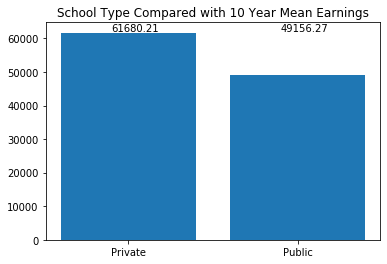

In [89]:
# Create a bar chart comparing school types
ypos = np.arange(len(gb_type["School Type"]))

plt.xticks(ypos, gb_type["School Type"])

plt.bar(ypos, gb_type["10 Year Mean Earnings"])
plt.title("School Type Compared with 10 Year Mean Earnings")

formatted_percent = ['%.2f' % elem for elem in gb_type["10 Year Mean Earnings"]]

for i, v in enumerate(formatted_percent):
    plt.text(ypos[i] - 0.1, 62000, str(v), color = "black")

plt.show()